<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:** Халифаева Лейла Илхамовна


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
# Ваш код здесь
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

C:\Users\halif\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [3]:
trans = pd.read_csv('transactions.csv', sep=';')
gend = pd.read_csv('gender.csv')

In [4]:
trans

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831


In [5]:
gend

,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0
...,...,...
8395,93715144,1.0
8396,51502229,0.0
8397,77655748,1.0
8398,87819773,1.0


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [6]:
df = pd.DataFrame()
df['value_sum'] = trans.groupby(by='user_id').sum()
df['value_mean'] = trans.groupby(by='user_id').mean()
df['value_std'] = trans.groupby(by='user_id').std()
df.reset_index(inplace= True)
df = df.merge(gend[['user_id','gender']])
df 

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.315,2143.619648,656.186785,1.0
1,27914,166436.523,2521.765500,415.972053,1.0
2,28753,251578.185,1980.930591,749.304999,0.0
3,31385,717856.052,2323.158744,632.491585,0.0
4,38084,1360028.958,2095.576206,649.030870,0.0
...,...,...,...,...,...
8351,99953525,159252.786,1608.614000,709.903466,0.0
8352,99967537,13026.313,2605.262600,123.013557,1.0
8353,99988578,1304612.429,2185.280451,638.235664,1.0
8354,99991245,249213.163,2026.123276,739.432221,1.0


In [7]:
df.isnull().sum() 

user_id        0
value_sum      0
value_mean     0
value_std     47
gender         0
dtype: int64

In [8]:
#поскольку есть пропуски, заменим их на 0
df.fillna(0, inplace=True)

### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [9]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=2023)

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [10]:
y_train = df_train['gender']
y_test = df_test['gender']

X_train = df_train[['value_sum', 'value_mean', 'value_std']]
X_test = df_test[['value_sum', 'value_mean', 'value_std']]

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [11]:
model_regression = LogisticRegression()
model_regression.fit(X_train, y_train)
p_pred = model_regression.predict_proba(X_test)
p_pred[:,-1]

array([0.44578544, 0.48736668, 0.46448284, ..., 0.39867911, 0.42121858,
       0.45437046])

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [12]:
y_pred = model_regression.predict(X_test)
print(f'ROC_AUC: {roc_auc_score(y_test, p_pred[:,-1])}')

y_pred = 1*(p_pred[:,-1] >= 0.5) 
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

ROC_AUC: 0.5641156100198443
Accuracy: 0.562200956937799
Precision: 0.6551724137931034
Recall: 0.02564102564102564


### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__ Все метрики в основном выше 0.5, что говорит о среднем качестве модели. Однако метрика recall(полнота) очень низкая, это говорит о том, что модель не находит класс Positive. В целом, модели можно доверять, но возможно предсказания на основе суммы покупок не очень репрезентативно отражают пол покупателя.

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [13]:
df_1 = pd.pivot_table(trans, values='value', index='user_id', columns='type', aggfunc=np.sum)
#поскольку есть пропуски, заменим их на 0
df_1.fillna(0, inplace=True)

df_1.reset_index(inplace= True)
df_1 = df_1.merge(gend[['user_id','gender']])
df_1.set_index('user_id', inplace= True)
df_1

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [14]:
df_1_train, df_1_test = train_test_split(df_1, test_size = 0.2, random_state=2023)

y_train = df_1_train['gender']
y_test = df_1_test['gender']

X_train = df_1_train[list(trans['type'].unique())]
X_test = df_1_test[list(trans['type'].unique())]

In [15]:
model_regression = LogisticRegression()
model_regression.fit(X_train, y_train)
p_pred = model_regression.predict_proba(X_test)
p_pred[:,-1]

y_pred = model_regression.predict(X_test)
print(f'ROC_AUC: {roc_auc_score(y_test, p_pred[:,-1])}')

y_pred = 1*(p_pred[:,-1] >= 0.5) 
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

ROC_AUC: 0.7977962546621035
Accuracy: 0.7284688995215312
Precision: 0.7125925925925926
Recall: 0.6491228070175439


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__ После такой агрегации данных, когда в качестве признаков мы используем именно траты на определенные типы покупок, все метрики выросли и стали значительно выше среднего. По всей видимости, такие признаки более показательно отражают представителей разных классов.

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [16]:
col = df_1.columns

In [17]:
normalizer = MinMaxScaler()
X_train[list(trans['type'].unique())] = normalizer.fit_transform(X_train[list(trans['type'].unique())])
X_test[list(trans['type'].unique())] = normalizer.transform(X_test[list(trans['type'].unique())])
X_train

,"Звонки с использованием телефонов, считывающих магнитную ленту","Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов",Станции техобслуживания,Товары для дома,Продажа электронного оборудования,Финансовые институты — снятие наличности автоматически,Денежные переводы,Универсальные магазины,Аптеки,"Бакалейные магазины, супермаркеты",...,Подрядчики по электричеству,Услуги копировальных центров,"Драгоценные камни и металлы, часы и ювелирные изделия","Судовые выплаты, включая алименты и детскую поддержку",Веломагазины — продажа и обслуживание,"Организации, членства, нигде ранее не классифицируемые","Услуги по переделке, починке и пошиву одежды","Ремонт бытовой техники, ремонт электроприборы",Агенты и менеджеры по аренде недвижимости,Агентства по аренде автомобилей
user_id,,,,,,,,,,,,,,,,,,,,,
15307012,0.022973,0.015978,0.015065,0.000000,0.0,0.046932,0.000607,0.014778,0.000878,0.056014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33536824,0.000829,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36996359,0.025430,0.001081,0.000000,0.000000,0.0,0.013640,0.009952,0.000000,0.029317,0.009612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87301914,0.007492,0.000000,0.000000,0.000000,0.0,0.007769,0.001555,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90458610,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000607,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69859713,0.002013,0.000000,0.000000,0.000000,0.0,0.014675,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71931448,0.002633,0.016923,0.000000,0.000000,0.0,0.025207,0.000000,0.010132,0.006510,0.039412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33343185,0.001549,0.000798,0.000000,0.000000,0.0,0.000000,0.004255,0.000000,0.000676,0.007938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

_При решении этой задачи я пользовалась [этим источником](https://medium.com/mlearning-ai/optimizing-machine-learning-models-with-gridsearchcv-c3ff518c3a48)_

In [18]:
parameters = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
lr = LogisticRegression()


logreg_cv = grid_search.fit(X_train, y_train)

print('Best parameter:', logreg_cv.best_params_['solver'])

Best parameter: liblinear


In [19]:
parameters = {'C': np.logspace(-2, 3, 20)}
lr = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(lr, param_grid=parameters, cv=4, scoring='roc_auc')
logreg_cv = grid_search.fit(X_train, y_train)

print('Best parameter:', logreg_cv.best_params_['C'])

Best parameter: 14.38449888287663


Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [20]:
p_pred = logreg_cv.predict_proba(X_test)
p_pred[:,-1]

y_pred = logreg_cv.predict(X_test)
print(f'ROC_AUC: {roc_auc_score(y_test, p_pred[:,-1])}')

y_pred = 1*(p_pred[:,-1] >= 0.5) 
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

ROC_AUC: 0.7933562941477464
Accuracy: 0.7236842105263158
Precision: 0.7773359840954275
Recall: 0.5276653171390013


Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__: В моем случае лучшего качества добиться не получилось, ROC AUC упал на почти 0.05, это может быть связано с полученной выборкой при делении данных на тестовую и тренировочную части. А поскольку параметр С получился высоким после нормировки модели, то и сама метрика тоже немного упала.

Кросс-валидация позволяет более оптимально подобрать гиперпараметр, а на отложенной тестовой выборке можно проверить качество полученных значений.

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

In [21]:
t = np.linspace(0, 1, num=1000)
p_pred = logreg_cv.predict_proba(X_test)
scores = []

for num in t:
    y_pred = 1*(p_pred[:,-1] >= num)
    scores.append(fbeta_score(y_test, y_pred, beta=5))

print('Best parameter:', t[scores.index(max(scores))])
print('F_beta:', max(scores))

Best parameter: 0.0
F_beta: 0.9539040451552211


Text(0, 0.5, 'F_beta score')

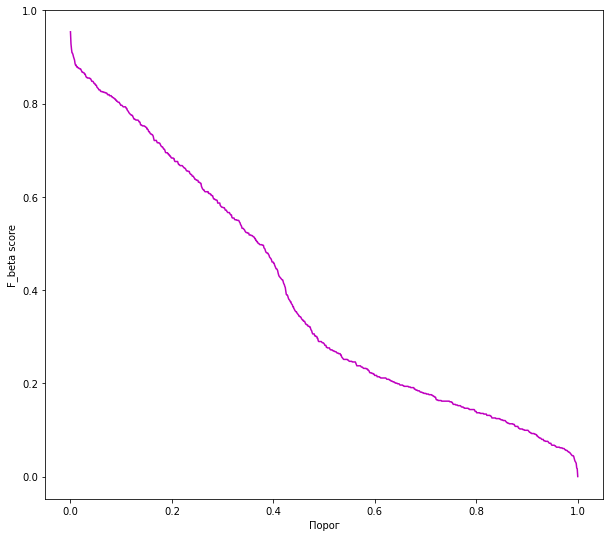

In [21]:
plt.figure(figsize=(10,9))
plt.plot(np.array(t), np.array(scores), color='m')
plt.xlabel('Порог')
plt.ylabel('F_beta score')

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [22]:
lrr = LogisticRegression(solver='liblinear', C=logreg_cv.best_params_['C'])
lrr.fit(X_train, y_train)
coefs = pd.DataFrame(data=lrr.coef_[0], index=X_train.columns)
coefs = coefs.sort_values(0)
print('Признаки, которые увеличивают вероятность метки 0:', ', '.join(coefs.index[:5].to_list()))
print('Признаки, которые увеличивают вероятность метки 1:', ', '.join(coefs.index[-5:].to_list()))

Признаки, которые увеличивают вероятность метки 0: Готовая женская одежда, Магазины косметики, Аптеки, Различные магазины одежды и аксессуаров, Одежда для всей семьи
Признаки, которые увеличивают вероятность метки 1: Транзакции по азартным играм, Галереи/учреждения видеоигр, Продажа электронного оборудования, Станции техобслуживания, Автозапчасти и аксессуары


# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [22]:
df_2 = pd.pivot_table(trans, values='value', index='user_id', columns='type', aggfunc=np.sum)
#поскольку есть пропуски, заменим их на 0(это значит, что покупок ороеделенного типа не совершалось)
df_2.fillna(0, inplace=True)

df_2.reset_index(inplace= True)
df_2 = df_2.merge(gend[['user_id','gender']])
df_2.set_index('user_id', inplace= True)
df_2

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0


In [23]:
df_2_train, df_2_test = train_test_split(df_2, test_size = 0.2, random_state=2023)

y_train_2 = df_2_train['gender']
y_test_2 = df_2_test['gender']

X_train_2 = df_2_train[list(trans['type'].unique())]
X_test_2 = df_2_test[list(trans['type'].unique())]

In [25]:
normalizer = Normalizer()
X_train_2[list(trans['type'].unique())] = normalizer.fit_transform(X_train_2[list(trans['type'].unique())])
X_test_2[list(trans['type'].unique())] = normalizer.transform(X_test_2[list(trans['type'].unique())])
X_train_2

,"Звонки с использованием телефонов, считывающих магнитную ленту","Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов",Станции техобслуживания,Товары для дома,Продажа электронного оборудования,Финансовые институты — снятие наличности автоматически,Денежные переводы,Универсальные магазины,Аптеки,"Бакалейные магазины, супермаркеты",...,Подрядчики по электричеству,Услуги копировальных центров,"Драгоценные камни и металлы, часы и ювелирные изделия","Судовые выплаты, включая алименты и детскую поддержку",Веломагазины — продажа и обслуживание,"Организации, членства, нигде ранее не классифицируемые","Услуги по переделке, починке и пошиву одежды","Ремонт бытовой техники, ремонт электроприборы",Агенты и менеджеры по аренде недвижимости,Агентства по аренде автомобилей
user_id,,,,,,,,,,,,,,,,,,,,,
15307012,0.950390,0.061906,0.019447,0.000000,0.0,0.110974,0.005226,0.032272,0.005185,0.278880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33536824,0.686875,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36996359,0.980423,0.003903,0.000000,0.000000,0.0,0.030056,0.079873,0.000000,0.161275,0.044597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87301914,0.997321,0.000000,0.000000,0.000000,0.0,0.059116,0.043089,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90458610,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69859713,0.923077,0.000000,0.000000,0.000000,0.0,0.384615,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71931448,0.425692,0.256209,0.000000,0.000000,0.0,0.232906,0.000000,0.086462,0.150168,0.766756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33343185,0.596764,0.028774,0.000000,0.000000,0.0,0.000000,0.341220,0.000000,0.037136,0.367998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
model = LogisticRegression()
model.fit(X_train_2, y_train_2)
p_pred = model.predict_proba(X_test_2)

y_pred = model.predict(X_test_2)
print(f'ROC_AUC: {roc_auc_score(y_test_2, p_pred[:,-1])}')

ROC_AUC: 0.7759791323305371


_Я поробовала разные способы нормализации данных, именно при Normalizer качество LogisticRegression было самым высоким, 
поэтому оставила именно этот вариант._

_Дальше я стала искать разные методы классификации, чтобы найти самый оптимальный. Так я опробовала методы [с этого сайта](https://cprosenjit.medium.com/10-classification-methods-from-scikit-learn-we-should-know-40c03ab8b077)_

In [27]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0, probability=True)
model.fit(X_train_2, y_train_2)
p_pred = model.predict_proba(X_test_2)

y_pred = model.predict(X_test_2)
print(f'ROC_AUC: {roc_auc_score(y_test_2, p_pred[:,-1])}')

ROC_AUC: 0.7712456386773759


In [28]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0, probability=True)
model.fit(X_train_2, y_train_2)
p_pred = model.predict_proba(X_test_2)

y_pred = model.predict(X_test_2)
print(f'ROC_AUC: {roc_auc_score(y_test_2, p_pred[:,-1])}')

ROC_AUC: 0.7676080020757505


In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_2, y_train_2)
p_pred = model.predict_proba(X_test_2)

y_pred = model.predict(X_test_2)
print(f'ROC_AUC: {roc_auc_score(y_test_2, p_pred[:,-1])}')

ROC_AUC: 0.6983385299570499


In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train_2, y_train_2)
p_pred = model.predict_proba(X_test_2)

y_pred = model.predict(X_test_2)
print(f'ROC_AUC: {roc_auc_score(y_test_2, p_pred[:,-1])}')

ROC_AUC: 0.6624818263124556


In [31]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_2, y_train_2)
p_pred = model.predict_proba(X_test_2)

y_pred = model.predict(X_test_2)
print(f'ROC_AUC: {roc_auc_score(y_test_2, p_pred[:,-1])}')

ROC_AUC: 0.827511955133641


In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train_2, y_train_2)
p_pred = model.predict_proba(X_test_2)

y_pred = model.predict(X_test_2)
print(f'ROC_AUC: {roc_auc_score(y_test_2, p_pred[:,-1])}')

ROC_AUC: 0.7007868137666317


In [33]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(alpha=1, max_iter=1000)
model.fit(X_train_2, y_train_2)
p_pred = model.predict_proba(X_test_2)

y_pred = model.predict(X_test_2)
print(f'ROC_AUC: {roc_auc_score(y_test_2, p_pred[:,-1])}')

ROC_AUC: 0.74954230573542


_Также попробовала RandomForestClassifier, который использовался на семинарах тоже, именно при этом методе метрика была самая высокая._

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=2023)
rfc.fit(X_train_2, y_train_2)
p_pred = rfc.predict_proba(X_test_2)
roc_auc_score(y_test_2, p_pred[:,-1])

0.82434976973956

### Вывод:
_В итоге, RandomForestClassifier сработал лучше всего и позволил добиться улучшения метрики почти на 0.1. Это может происходить за счет нелинейности алгоритма._